In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams28.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [3]:
len(df)

18488

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18488 entries, 0 to 18487
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18488 non-null  int64  
 1   N_Person           18488 non-null  int64  
 2   Xcenter            18488 non-null  float64
 3   Ycenter            18488 non-null  float64
 4   PerXmin            18488 non-null  float64
 5   PerYmin            18488 non-null  float64
 6   PerXmax            18488 non-null  float64
 7   PerYmax            18488 non-null  float64
 8   N_Handgun          18488 non-null  int64  
 9   HgXcenter          18488 non-null  float64
 10  HgYcenter          18488 non-null  float64
 11  HgXmin             18488 non-null  float64
 12  HgYmin             18488 non-null  float64
 13  HgXmax             18488 non-null  float64
 14  HgYmax             18488 non-null  float64
 15  Intersection       18488 non-null  object 
 16  Included_Center    184

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14242
Ycenter              14223
PerXmin              14250
PerYmin              14247
PerXmax              14250
PerYmax              14227
N_Handgun                5
HgXcenter             7302
HgYcenter             7300
HgXmin                7304
HgYmin                7304
HgXmax                7304
HgYmax                7303
Intersection             9
Included_Center          2
Intersection_Area     8453
Hg_Area               7304
Distance             18488
Ground_Truth             3
GT                       3
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    16519
2     1744
0      225
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18488 entries, 0 to 18487
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18488 non-null  int64  
 1   N_Person                      18488 non-null  int64  
 2   Xcenter                       18488 non-null  float64
 3   Ycenter                       18488 non-null  float64
 4   PerXmin                       18488 non-null  float64
 5   PerYmin                       18488 non-null  float64
 6   PerXmax                       18488 non-null  float64
 7   PerYmax                       18488 non-null  float64
 8   N_Handgun                     18488 non-null  int64  
 9   HgXcenter                     18488 non-null  float64
 10  HgYcenter                     18488 non-null  float64
 11  HgXmin                        18488 non-null  float64
 12  HgYmin                        18488 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 2: 'GBC', 0: 'LR'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    16519
2     1744
0      225
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18488 entries, 0 to 18487
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18488 non-null  int64  
 1   N_Person                      18488 non-null  int64  
 2   Xcenter                       18488 non-null  float64
 3   Ycenter                       18488 non-null  float64
 4   PerXmin                       18488 non-null  float64
 5   PerYmin                       18488 non-null  float64
 6   PerXmax                       18488 non-null  float64
 7   PerYmax                       18488 non-null  float64
 8   N_Handgun                     18488 non-null  int64  
 9   HgXcenter                     18488 non-null  float64
 10  HgYcenter                     18488 non-null  float64
 11  HgXmin                        18488 non-null  float64
 12  HgYmin                        18488 non-null  float64
 13  H

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14790, 28) (14790,)
(3698, 28) (3698,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9031102096010818
mean_test =  0.9031778228532792


,fit_time,score_time,test_score,train_score
0,0.059846,0.002988,0.902637,0.902937
1,0.056854,0.002988,0.906694,0.902487
2,0.056857,0.002985,0.902637,0.903538
3,0.057846,0.002988,0.899932,0.903388
4,0.056853,0.002989,0.901961,0.903163
5,0.056853,0.002989,0.901285,0.903388
6,0.057855,0.001985,0.906694,0.902637
7,0.056854,0.002987,0.901285,0.903388
8,0.058848,0.001991,0.903989,0.903088
9,0.056854,0.002992,0.904665,0.903088


In [15]:
# save the model to disk
filename = 'rfc_model_intersection_0.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9437607993388927
mean_test =  0.9423935091277892


,fit_time,score_time,test_score,train_score
0,0.096741,0.002992,0.942529,0.940951
1,0.097711,0.003020,0.941176,0.941252
2,0.097710,0.002992,0.939824,0.938322
3,0.097740,0.002992,0.940500,0.944632
4,0.098736,0.002992,0.938472,0.936519
5,0.100730,0.002997,0.949290,0.949666
6,0.101728,0.003990,0.945909,0.948764
7,0.098735,0.002992,0.943205,0.946510
8,0.097738,0.003990,0.943205,0.947788
9,0.098735,0.002992,0.939824,0.943205


In [16]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2])

array([[[3651,    0],
        [  13,   34]],

       [[ 201,  200],
        [   2, 3295]],

       [[3340,    4],
        [ 189,  165]]], dtype=int64)

                         feature  importance       std
21      Intersection_Down_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
8                      N_Handgun    0.000024  0.000072
20     Intersection_Center_right    0.000262  0.000671
7                        PerYmax    0.002117  0.003550
10                     HgYcenter    0.003700  0.007159
1                       N_Person    0.004088  0.012084
12                        HgYmin    0.004514  0.007783
6                        PerXmax    0.004751  0.010445
3                        Ycenter    0.005564  0.016692
25        Intersection_Up_center    0.006815  0.015665
23           Intersection_Inside    0.007588  0.017709
14                        HgYmax    0.011262  0.021076
19      Intersection_Center_left    0.013166  0.035426
0                          Frame    0.015035  0.028345
17                       Hg_Area    0.021873  0.044213
9         

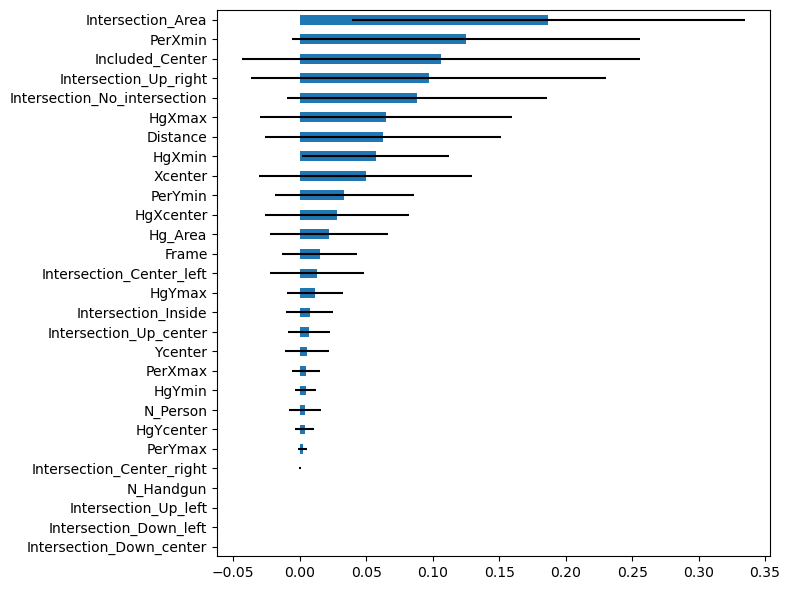

In [17]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        47
           1       0.94      1.00      0.97      3297
           2       0.98      0.47      0.63       354

    accuracy                           0.94      3698
   macro avg       0.97      0.73      0.81      3698
weighted avg       0.95      0.94      0.94      3698



In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18488 entries, 0 to 18487
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18488 non-null  int64  
 1   N_Person                      18488 non-null  int64  
 2   Xcenter                       18488 non-null  float64
 3   Ycenter                       18488 non-null  float64
 4   PerXmin                       18488 non-null  float64
 5   PerYmin                       18488 non-null  float64
 6   PerXmax                       18488 non-null  float64
 7   PerYmax                       18488 non-null  float64
 8   N_Handgun                     18488 non-null  int64  
 9   HgXcenter                     18488 non-null  float64
 10  HgYcenter                     18488 non-null  float64
 11  HgXmin                        18488 non-null  float64
 12  HgYmin                        18488 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86649571, -1.00484261,  0.38668968, -1.05888239,  0.40823696,
        -0.80106576,  0.34945563, -1.43050903, -0.49716609,  0.64776995,
        -1.25955545,  0.70065568, -1.17782934,  0.59349494, -1.33662101,
         1.17958094, -0.05217793, -0.63147801, -0.6975061 ,  2.66556129,
        -0.28401411, -0.01801777, -0.01040144, -0.53925044, -1.08553695,
        -0.11989607, -0.06164925, -0.1329263 ],
       [-1.86432626, -1.00484261,  0.38640419, -1.05829211,  0.40725557,
        -0.79937763,  0.34990085, -1.43325875, -0.49716609,  0.64617629,
        -1.26040971,  0.69765616, -1.17848054,  0.5932942 , -1.33768035,
         1.17958094, -0.04976617, -0.62560254, -0.69607761,  2.66556129,
        -0.28401411, -0.01801777, -0.01040144, -0.53925044, -1.08553695,
        -0.11989607, -0.06164925, -0.1329263 ],
       [-1.86215681, -1.00484261,  0.3870242 , -1.0604457 ,  0.40872342,
        -0.80342981,  0.34962008, -1.42924574, -0.49716609,  0.64599786,
        -1.26182406,  0.6975

In [22]:
print(scaler.mean_)

[8.60354662e+02 8.78678061e-01 3.92909894e+02 3.82447146e+02
 3.05549552e+02 2.46079439e+02 4.80270237e+02 5.18814854e+02
 2.98734314e-01 3.10721446e+02 3.12482648e+02 2.87328701e+02
 2.92918688e+02 3.34114192e+02 3.32046607e+02 4.18163133e-01
 9.32062846e+02 2.02996039e+03 2.31990043e+02 1.23377326e-01
 7.46430117e-02 3.24534833e-04 1.08178278e-04 2.25281264e-01
 5.40945478e-01 1.41713544e-02 3.78623972e-03 1.73626136e-02]


In [23]:
print(scaler.scale_)

[4.60946500e+02 8.74443474e-01 2.12287940e+02 6.88123628e+01
 2.20038135e+02 1.11946757e+02 2.12763532e+02 3.91830351e+01
 6.00874272e-01 1.53079874e+02 9.72046840e+01 1.52336839e+02
 9.91681113e+01 1.54315404e+02 9.58134475e+01 4.93257263e-01
 1.67000976e+03 1.81867324e+03 1.37445609e+02 3.28869824e-01
 2.62814445e-01 1.80119269e-02 1.04003161e-02 4.17767418e-01
 4.98320648e-01 1.18196984e-01 6.14158295e-02 1.30618350e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13866, 28)

In [26]:
y_train.value_counts()

1    12389
2     1308
0      169
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4622, 28)

In [28]:
y_test.value_counts()

1    4130
2     436
0      56
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[6.08838996e-09, 9.99999718e-01, 2.76381552e-07],
       [1.32709676e-10, 9.99999999e-01, 4.26992168e-10],
       [1.54734408e-11, 1.00000000e+00, 3.53294738e-11],
       ...,
       [8.74953873e-11, 1.00000000e+00, 1.86000608e-10],
       [9.52358125e-06, 9.98804947e-01, 1.18552975e-03],
       [1.70561864e-10, 9.99999999e-01, 1.07586776e-09]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[4560,    6],
        [   1,   55]],

       [[ 475,   17],
        [  32, 4098]],

       [[4159,   27],
        [  17,  419]]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        56
           1       1.00      0.99      0.99      4130
           2       0.94      0.96      0.95       436

    accuracy                           0.99      4622
   macro avg       0.95      0.98      0.96      4622
weighted avg       0.99      0.99      0.99      4622



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9945189672580412
Score test =  0.9891821722198183


In [32]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

KeyboardInterrupt: 

In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))